<a href="https://colab.research.google.com/github/Manish-N-2006/Diabetes_Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetics Prediction


In [38]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
df = pd.read_csv("diabetes.csv")
df.head()
df.rename(columns={'Outcome' : 'Diabetes'}, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
df.isnull().sum()
(df==0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Diabetes,500


In [39]:
cols_with_zero = [""]

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Diabetes,500


In [45]:
df["Glucose"] = df["Glucose"].replace(0,np.nan)
df['Glucose'] = df["Glucose"].fillna(df["Glucose"].median())
(df==0).sum()

,0
Pregnancies,111
Glucose,0
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Diabetes,500


In [46]:
cols_with_zero = ['Pregnancies', 'BloodPressure', 'SkinThickness','Insulin','BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0,np.nan)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])

Replaced the value 0 with KNN Imputation

In [47]:
(df==0).sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Diabetes,500


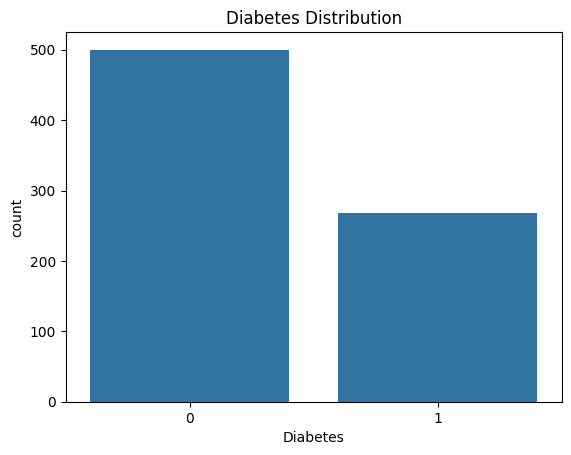

In [48]:
sb.countplot(x='Diabetes', data=df)
plt.title("Diabetes Distribution")
plt.show()


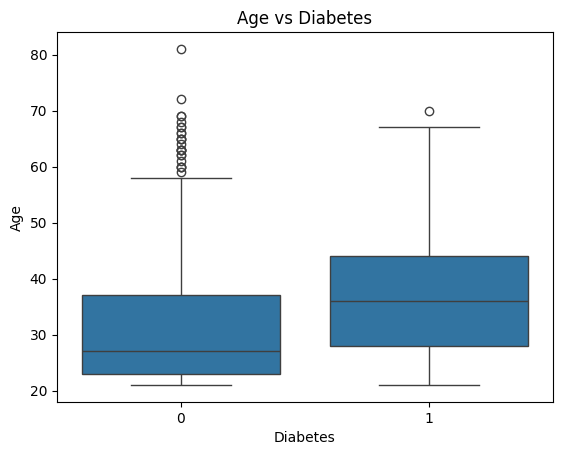

In [49]:
plt.title("Age vs Diabetes")
sb.boxplot(x="Diabetes", y="Age", data=df)
plt.show()

Older Age peoples have higher diabetes risk.

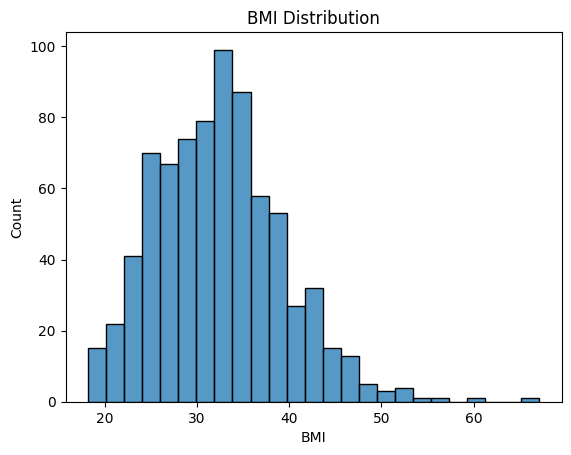

In [50]:
sb.histplot(df['BMI'])
plt.title("BMI Distribution")
plt.show()

BMI is higher for people in Age range 30 - 40 , they have higher risk of diabetes


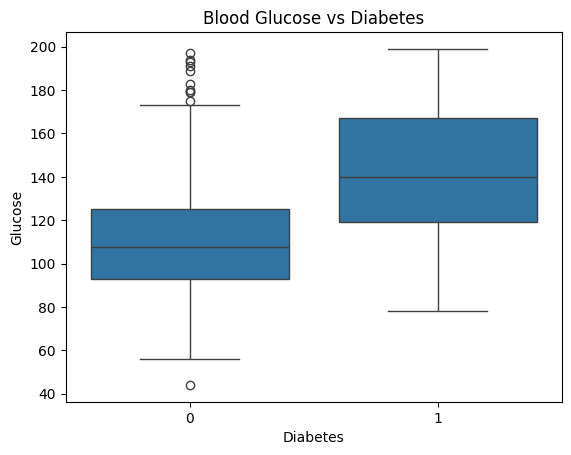

In [51]:
sb.boxplot(x="Diabetes", y = "Glucose", data=df)
plt.title("Blood Glucose vs Diabetes")
plt.show()

Diabetes patients have high Blood Glucose rate

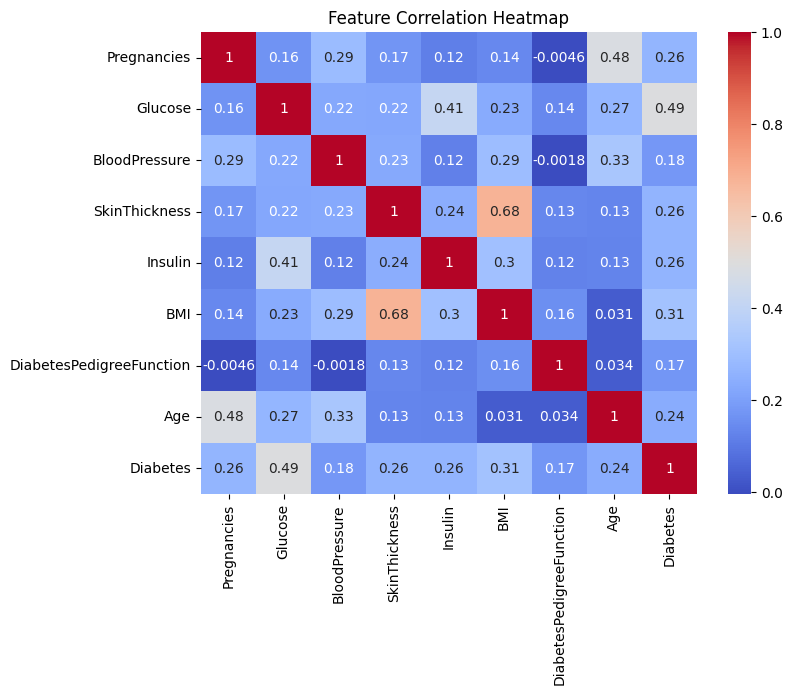

In [52]:
plt.figure(figsize=(8,6))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


So, All the variables are co-related.

In [37]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [60]:
print("Accuracy Score: ",round(accuracy_score(y_test, y_pred_lr)*100,2),"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classififcation reports:\n", classification_report(y_test,y_pred_lr))


Accuracy Score:  77.92 %
Confusion Matrix:
 [[89 10]
 [24 31]]
Classififcation reports:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



Logistic Regression :
Accuracy Score is nearly 78%, And Recall is higher for No diabetes but lesser for diabetes

In [62]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [63]:
print("Accuracy Score: ",round(accuracy_score(y_test, y_pred_rf)*100,2),"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classififcation reports:\n", classification_report(y_test,y_pred_rf))


Accuracy Score:  82.47 %
Confusion Matrix:
 [[87 12]
 [15 40]]
Classififcation reports:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        99
           1       0.77      0.73      0.75        55

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.81       154
weighted avg       0.82      0.82      0.82       154



Random Forest: Accuracy Score is 82 %, And Recall is better for both Diabetes and No Diabetes people. And also less False Negative comparing to Logistic Regression

In [64]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [65]:
print("Accuracy Score: ",round(accuracy_score(y_test, y_pred_knn)*100,2),"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classififcation reports:\n", classification_report(y_test,y_pred_knn))


Accuracy Score:  73.38 %
Confusion Matrix:
 [[82 17]
 [24 31]]
Classififcation reports:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



KNN: Accuracy Score is 73 %, And Recall is good for No diabetes and poor for diabetes. This model is less efficient then the Above 2 models

So, Overall Random Forest Model performs well with good Accuracy Score and Recall Score.

## Model Evaluation Summary

Although Logistic Regression achieved reasonable accuracy, Random Forest showed significantly higher recall.

Therefore, Random Forest was selected as the final model due to its better ability to correctly identify patients with the disease.